In [ ]:
import pandas as pd

In [ ]:
data = pd.read_excel("/content/Absenteeism_at_work.xls")

In [ ]:
data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2


In [ ]:
data.isnull().sum()

,0
ID,0
Reason for absence,0
Month of absence,0
Day of the week,0
Seasons,0
Transportation expense,0
Distance from Residence to Work,0
Service time,0
Age,0
Work load Average/day,0


In [ ]:
data.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [ ]:
features = ['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
            'Transportation expense', 'Distance from Residence to Work', 'Service time',
            'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure',
            'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight',
            'Height', 'Body mass index', 'Absenteeism time in hours']

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(data[features])

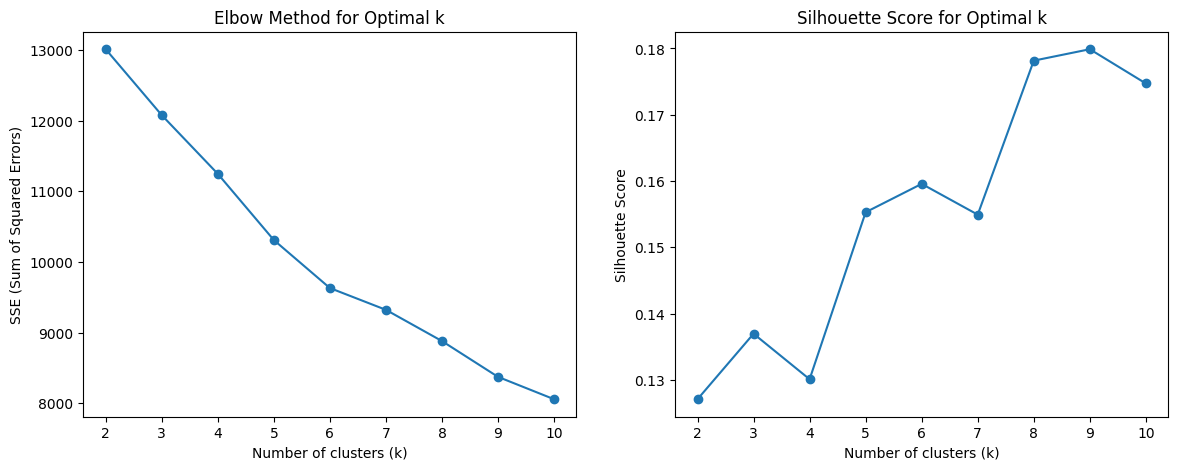

In [ ]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
sse = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plot the Elbow Method and Silhouette Score
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(K_range, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.title('Elbow Method for Optimal k')

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')

plt.show()

In [ ]:
optimal_k = K_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters (k) based on silhouette score: {optimal_k}")
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

Optimal number of clusters (k) based on silhouette score: 9


In [ ]:
silhouette_avg = silhouette_score(X, data['Cluster'])
print(f"Silhouette Score for k={optimal_k}: {silhouette_avg}")

Silhouette Score for k=9: 0.17987598418158812


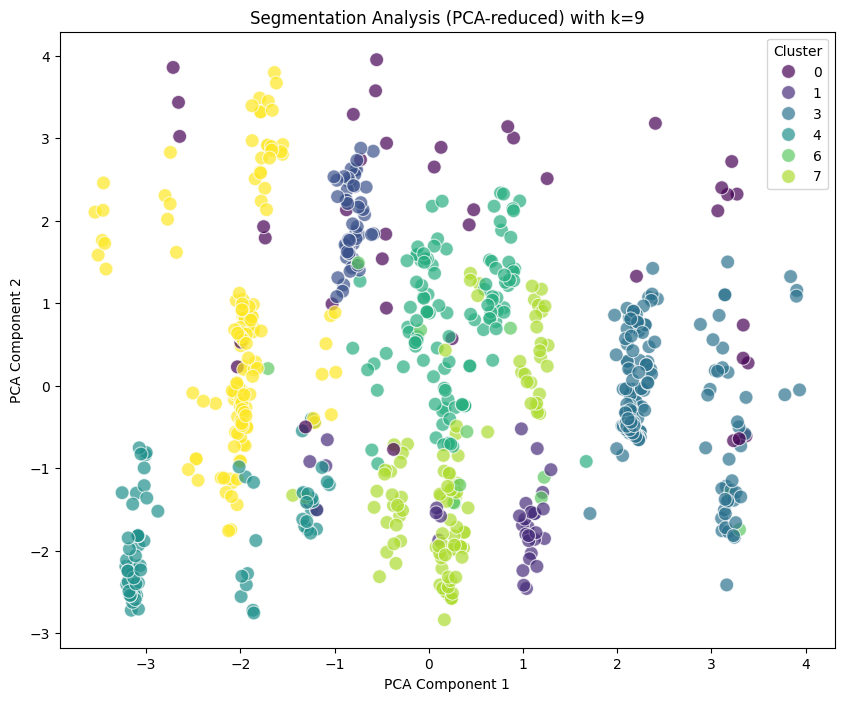

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
data['PCA1'] = X_pca[:, 0]
data['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data, palette='viridis', s=100, alpha=0.7)
plt.title(f'Segmentation Analysis (PCA-reduced) with k={optimal_k}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


**Elbow Method:**
The Elbow Method plot shows a gradual decrease in SSE as the number of clusters
𝑘
k increases. There is no clear, sharp "elbow" point, but it starts to flatten out around
𝑘
=
6
k=6, indicating a good trade-off between compactness and simplicity.

**Silhouette Score:**
The Silhouette Score plot indicates that
𝑘
=
9
k=9 achieves the highest score, approximately 0.18, which is the optimal number of clusters according to this metric.
Although the Silhouette Score is relatively low (below 0.2), it still suggests that
𝑘
=
9
k=9 provides better-defined clusters than other values.
Inference:
Optimal Number of Clusters: Based on the Silhouette Score,
𝑘
=
9
k=9 is the optimal number of clusters for your data, as it provides the highest cohesion and separation compared to other
𝑘
k values.

Low Silhouette Score: **bold text** The relatively low silhouette score (0.18) might indicate that the clusters are not very distinct from each other. This could be due to several reasons:

The features chosen may not fully differentiate customer segments.
There might be some overlap between the patterns of absenteeism in the different groups.